In [12]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from gen_ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<H1>Przygotowanie zbioru danych: XOR<H1>

In [60]:
x = np.arange(1, 2, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.zeros(shape=(len(dataX)))

for sample in range(len(dataX)):
    data_labels[sample] = round(dataX[sample]) * round(dataY[sample])


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]
#
# ax.scatter(dataX, dataY, data_labels, c=rgb)
#
# plt.show()

<H1>Utworzenie funkcji przynależności</H1>

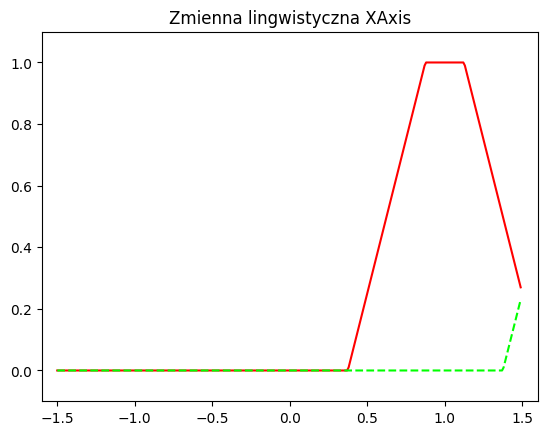

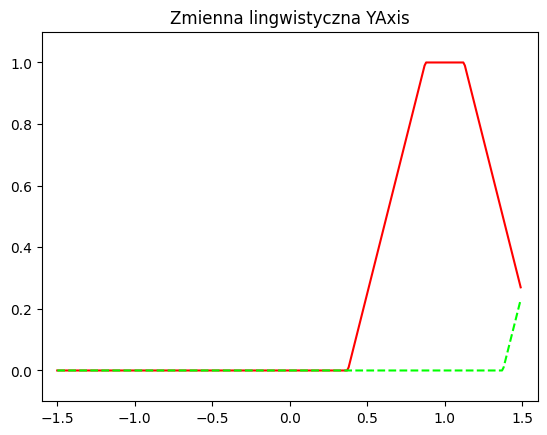

In [61]:
# varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
# varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

mf1 = [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["1","2"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["1","2"])
#Wyświetlanie funkcji przynależnosci
# plt.figure()
varX.show()
# plt.legend()

plt.figure()
varY.show()
# plt.legend()
plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5]], [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5]]] 
Konkluzje:  [[0.7887195  0.98240903 0.79829662]
 [0.49194343 0.68610026 0.89432828]
 [0.29836263 0.06076122 0.07028325]
 [0.65863118 0.19647889 0.30844903]]


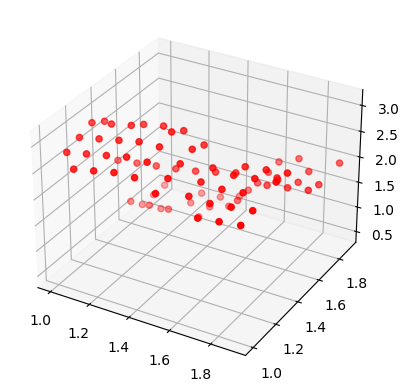

In [62]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

C:\Users\cubix\Desktop\MSI\lab02\ANFIS.py:80: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   2.5588237595386154
Liczba ew:  66810
Liczba it:  50
TIME elapsed:  19.078185081481934


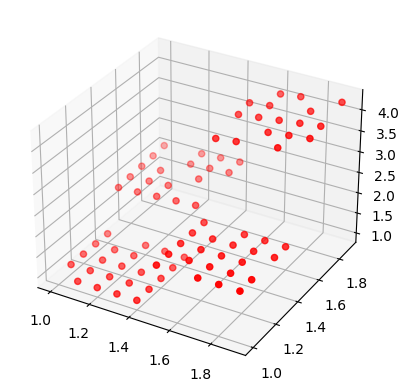

In [63]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

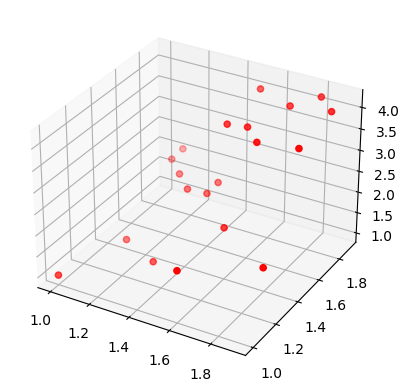

[[3 0 0]
 [0 9 0]
 [0 0 8]]


In [64]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

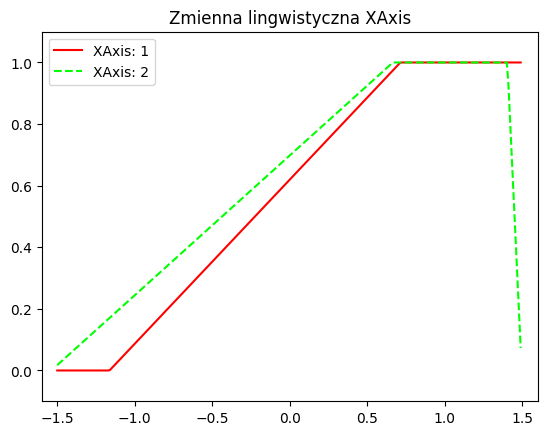

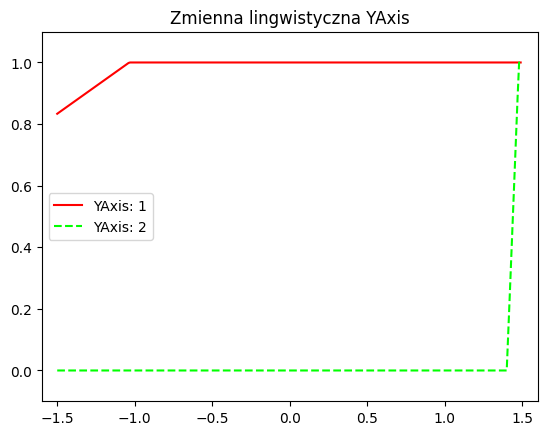

In [70]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [71]:
print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

Parametry końcowe:
Przesłanki:  array([[[1.64810855e+00, 1.86818765e+00, 1.87661827e+00, 3.70229209e+00],
        [1.03495311e+00, 7.38775707e-01, 2.20374810e+00, 9.23637356e-02]],

       [[7.51795223e-01, 3.57471238e+00, 2.79000968e+00, 1.21268331e+00],
        [2.16859730e+00, 1.37920270e+00, 7.85497655e-02, 4.25945183e-17]]]) 
Konkluzje:  array([[4.84075125e-12, 4.48818342e-11, 2.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.78450206e-11],
       [1.17647053e+00, 1.17647064e+00, 2.00000000e+00],
       [5.30649790e-12, 0.00000000e+00, 7.05881455e-01]])


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

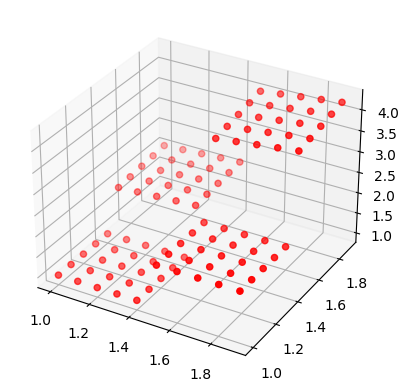

In [72]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [73]:
fis.premises = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

SyntaxError: invalid syntax (2678942874.py, line 1)

In [ ]:
fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

In [24]:
%matplotlib auto

Using matplotlib backend: TkAgg


In [25]:
%matplotlib inline

In [36]:
x = np.arange(1, 5, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.zeros(shape=(len(dataX)))

for sample in range(len(dataX)):
    data_labels[sample] = round(dataX[sample]) * round(dataY[sample])

In [37]:
mf1 = [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["1","2"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["1","2"])

Parametry początkowe:
Przesłanki:  [[[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]], [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]]] 
Konkluzje:  [[0.80027846 0.69441382 0.19741481]
 [0.24735707 0.83598868 0.09675226]
 [0.64496435 0.77892716 0.81709307]
 [0.01313981 0.20020396 0.16641114]
 [0.85355509 0.19718932 0.35976308]
 [0.86139763 0.41204177 0.00576921]
 [0.38687922 0.9239928  0.69883773]
 [0.7288119  0.02711228 0.47165193]
 [0.11477572 0.32761836 0.82058785]
 [0.36238287 0.52699715 0.4756353 ]
 [0.83213086 0.88912495 0.85703913]
 [0.84899605 0.1329207  0.98976943]
 [0.24712603 0.9585338  0.49124338]
 [0.34615222 0.13564041 0.49695822]
 [0.26960614 0.72857923 0.2555334 ]
 [0.95489099 0.68884963 0.66331164]
 [0.70908063 0.36456798 0.21614592]
 [0.22849162 0.43386035 0.90774405]
 [0.89177502 0.07764911 0.12729697]
 [0.04581659 0.9675789  0.41481872]
 [0.9498907  0.90

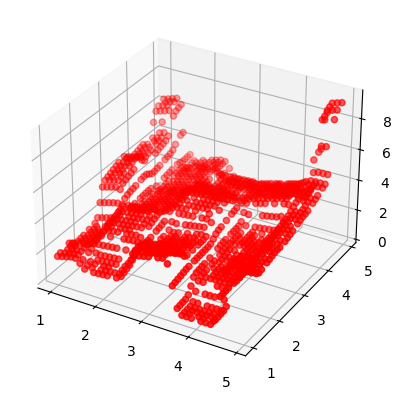

In [38]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

Current best score: 4849.5888: 100%|██████████| 100/100 [01:17<00:00,  1.29it/s]

Optymalizacja zakończona!
z blędem:   4849.5888203235045
Liczba it:  100
TIME elapsed:  82.87887120246887


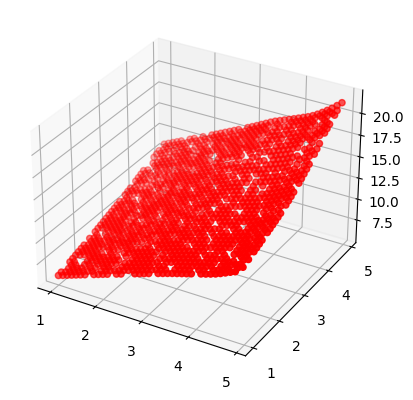

In [45]:
start = time.time()
fis.train(True, True, False, True, n_iter=100, float_divisions=750000000)
end = time.time()
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

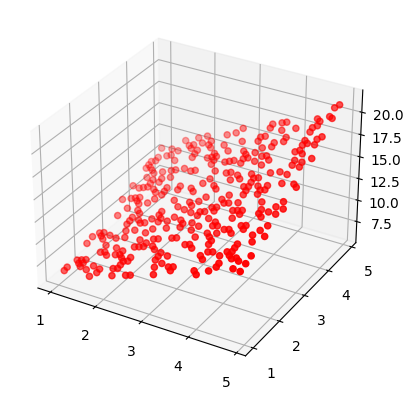

In [46]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

# y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
# y_pred = list(map(round,y_pred.flatten()))
# print(confusion_matrix(y_test, y_pred))

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [49]:
mf1 = {"1": [1, 0.25, 0.5, 0.5],
       "2": [2, 0.25, 0.5, 0.5],
       "3": [3, 0.25, 0.5, 0.5],
       "4": [4, 0.25, 0.5, 0.5],
       "5": [5, 0.25, 0.5, 0.5],
}

times = []
confusion_matrices = []
results = []

for test in range(2, 6):
    x = np.arange(1, test, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.zeros(shape=(len(dataX)))

    for sample in range(len(dataX)):
        data_labels[sample] = round(dataX[sample]) * round(dataY[sample])

    varX = FuzzyInputVariable_List_Trapezoids(list(mf1.values())[:test], "XAxis", list(mf1.keys())[:test])
    varY = FuzzyInputVariable_List_Trapezoids(list(mf1.values())[:test], "XAxis", list(mf1.keys())[:test])

    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
    fis = ANFIS([varX, varY], X_train.T, y_train)

    start = time.time()
    result = fis.train(True, True, False, True, n_iter=200, float_divisions=750000000)
    end = time.time()

    fis.training_data = X_test.T
    fis.expected_labels = y_test
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = list(map(round,y_pred.flatten()))

    times.append(end - start)
    results.append(result)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    # print(confusion_matrix(y_test, y_pred))

  0%|          | 0/200 [00:00<?, ?it/s]C:\Users\cubix\Desktop\MSI\lab03\gen_ANFIS.py:82: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum
Current best score: 50.9830: 100%|██████████| 200/200 [00:17<00:00, 11.20it/s]


Optymalizacja zakończona!
z blędem:   50.98303043125367
Liczba it:  200


  0%|          | 0/200 [00:00<?, ?it/s]C:\Users\cubix\Desktop\MSI\lab03\gen_ANFIS.py:82: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum
Current best score: 238.4256: 100%|██████████| 200/200 [00:38<00:00,  5.14it/s]


Optymalizacja zakończona!
z blędem:   238.42558510378058
Liczba it:  200


Current best score: 3220.4685:  15%|█▌        | 30/200 [00:12<01:06,  2.57it/s]C:\Users\cubix\Desktop\MSI\lab03\gen_ANFIS.py:82: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum
Current best score: 815.5217: 100%|██████████| 200/200 [01:23<00:00,  2.41it/s] 


Optymalizacja zakończona!
z blędem:   815.5217466926539
Liczba it:  200


Current best score: 3574.2300: 100%|██████████| 200/200 [02:30<00:00,  1.33it/s]

Optymalizacja zakończona!
z blędem:   3574.2300351754275
Liczba it:  200


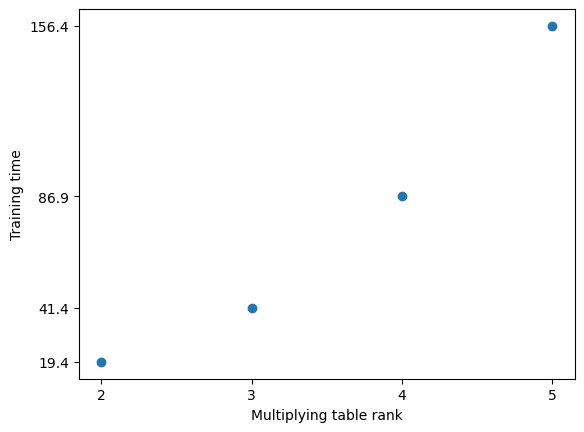

In [53]:
plt.scatter([2, 3, 4, 5], times)
plt.xlabel('Multiplying table rank')
plt.xticks([2,3,4,5])
plt.ylabel('Training time')
plt.yticks(times)
plt.show()

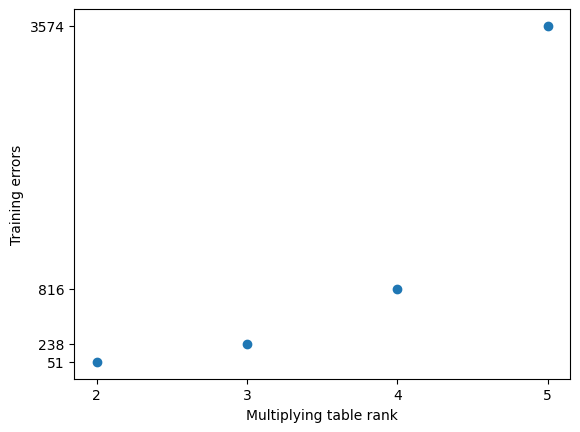

In [54]:
plt.scatter([2, 3, 4, 5], results)
plt.xlabel('Multiplying table rank')
plt.xticks([2, 3, 4, 5])
plt.ylabel('Training errors')
plt.yticks(results)
plt.show()